# 02. Neural Network Classification With PyTorch

Classification: 1. Multiple 2. Binary

## Make Classfication Data and get ready

In [ ]:
import sklearn
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples, noise=0.03, random_state=42)

In [ ]:
len(X), len(y)

(1000, 1000)

In [ ]:
import pandas as pd
circles = pd.DataFrame({"X1": X[:, 0], "X2": X[:, 1], "label": y})
circles.head()

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


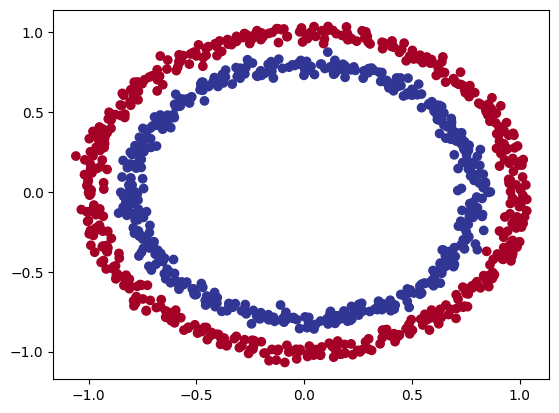

In [ ]:
# visualise

import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

Note: Data we working with is often referreed to a toy data set

In [ ]:
##Check Input and output Shapes
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
X_sample = X[0]
y_sampled = y[0]

import torch
torch.__version__

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)


In [ ]:
#split data into training and test sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
## 2. Building a model

In [ ]:
from torch import nn

device = 'cuda' if torch.cuda.is_available() else "cpu"
device

'cuda'

# Now we set up device agnositic code

Subclasses `nn.module`
create 2 `nn.linear()`
create `forward()` method
Instantiate an instance of our model class and sent it to the target device

In [ ]:
X_train, y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         ...,
         [ 0.0157, -1.0300],
         [ 1.0110,  0.1680],
         [ 0.5578, -0.5709]]),
 tensor([1., 0., 0., 0., 1.]))

In [ ]:
## Construct a model that sub classses nn.mmodule

class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=5)
    self.layer_2 = nn.Linear(in_features=5, out_features=1)
    #self.two_linear_layers = nn.Sequential(
     #   nn.Linear(in_features=2, out_features=5),
     #   nn.Linear(in_features=5, out_features=1)
    #)

  def forward(self, x: torch.Tensor) -> torch.Tensor:
   return self.layer_2(self.layer_1(x)) #x-> layer(1) -> layer_2
   #return self.two_linear_layers(x)

model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
next(model_0.parameters()).device

device(type='cuda', index=0)

In [ ]:
# lets replicate using nn.sequential

model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
# make some predicitons with the mdoel
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.3158, -0.2343],
                      [-0.2379,  0.1372],
                      [ 0.6735,  0.6033],
                      [ 0.1326,  0.2732],
                      [ 0.3833, -0.0716]], device='cuda:0')),
             ('0.bias',
              tensor([ 0.3562, -0.5999, -0.2753,  0.3316,  0.2463], device='cuda:0')),
             ('1.weight',
              tensor([[-0.0166,  0.0483, -0.3060,  0.0335, -0.1879]], device='cuda:0')),
             ('1.bias', tensor([-0.1342], device='cuda:0'))])

In [ ]:
with torch.inference_mode():
  untrained_preds = model_0(X_test.to(device))
print(f"Length of preds: {len(untrained_preds)}")
print(f"Shape of preds: {untrained_preds.shape}")

Length of preds: 200
Shape of preds: torch.Size([200, 1])


In [ ]:
y_test

tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0.,
        1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1.,
        1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
        1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0.,
        0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0.,
        1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0.,
        0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0.,
        1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
        0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1.,
        1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
        0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0.,
        1., 1.])

In [ ]:
## 2.1 set up loss function or optimiser

# binary cross entropy loss
# # for regression and classification we like BCE loss
# optimiser, Adam or SGD

# set up loss function
loss_fn = nn.BCELoss() # requires inputs to have gone through sigmoid activation function
loss_fn = nn.BCEWithLogitsLoss() #combines sigmpid layer with BCE loss
# this version is more numerically stable that sigmoid + BCE loss

optimiser = torch.optim.SGD(params=model_0.parameters(),lr=0.01)


In [ ]:
# calculate accuracy out of 100 what % does our model get right
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/len(y_pred)) * 100
  return acc


#3. Train Model
1. Forward Pass
2.Calculate the loss
3. Optimise
4. Loss backward
Optimiser ste


In [ ]:
### Going from raw logits -> prdiction probablities -> labels

In [ ]:
## model outputs are raw logits
## softmax for binary classification
## model predicitons probabilities to labels
## bby rounding or taking argmax(for outputs of softmax activation)
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))
device

'cuda'

In [ ]:
y_pred_probabs = torch.sigmoid(y_logits)
y_pred_probabs

tensor([[0.4704],
        [0.4330],
        [0.5311],
        [0.4535],
        [0.4700],
        [0.4476],
        [0.3910],
        [0.3942],
        [0.5335],
        [0.4298],
        [0.4731],
        [0.4578],
        [0.3900],
        [0.5326],
        [0.5430],
        [0.4197],
        [0.4180],
        [0.4908],
        [0.4901],
        [0.5106],
        [0.4322],
        [0.4087],
        [0.5005],
        [0.5057],
        [0.3986],
        [0.3952],
        [0.5229],
        [0.4300],
        [0.5484],
        [0.5229],
        [0.4096],
        [0.3998],
        [0.4660],
        [0.4953],
        [0.4727],
        [0.4321],
        [0.4571],
        [0.5335],
        [0.5074],
        [0.5291],
        [0.5048],
        [0.5309],
        [0.4185],
        [0.4744],
        [0.4640],
        [0.4273],
        [0.4599],
        [0.4324],
        [0.4391],
        [0.4567],
        [0.4564],
        [0.4617],
        [0.4226],
        [0.4856],
        [0.4087],
        [0

In [ ]:
y_preds = torch.round(y_pred_probabs)
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))


In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
epochs = 100

for epochs in range(epochs):
## training
    model_0.train()
    # forward pass
    y_logits = model_0(X_train.to(device)).squeeze()
    y_preds = torch.round(torch.sigmoid(y_logits)) # turn logits in to pred probs into pred labels
    # loss/accuracy
    # loss = loss_fn(torch.sigmoid(y_logits)) ## for BCE loss
    loss = loss_fn(y_logits.to(device), y_train.to(device)) ## nn.BCEwith Logits Loss expects raw logits as input
    acc = accuracy_fn(y_true=y_train.to(device), y_pred=y_preds.to(device))

    # Optimiser
    optimiser.zero_grad()
    loss.backward() # backprop
    optimiser.step() # gradient descent

    model_0.eval()
    with torch.inference_mode():
        test_logits = model_0(X_test.to(device)).squeeze()
        test_preds = torch.round(torch.sigmoid(test_logits))

        test_loss = loss_fn(test_logits.to(device), y_test.to(device))
        test_acc = accuracy_fn(y_true=y_test.to(device), y_pred=test_preds.to(device))

    #print whats happening
    if epochs % 10 == 0:
        print(f"Epoch: {epochs} | Loss: {loss:.5f} | Acc: {acc:.2f}% | Test Loss: {test_loss:.5f} | Test Acc: {test_acc:.2f}%")



Epoch: 0 | Loss: 0.70140 | Acc: 47.25% | Test Loss: 0.69452 | Test Acc: 53.50%
Epoch: 10 | Loss: 0.70112 | Acc: 47.25% | Test Loss: 0.69431 | Test Acc: 54.00%
Epoch: 20 | Loss: 0.70085 | Acc: 47.62% | Test Loss: 0.69411 | Test Acc: 54.00%
Epoch: 30 | Loss: 0.70060 | Acc: 47.75% | Test Loss: 0.69393 | Test Acc: 54.00%
Epoch: 40 | Loss: 0.70036 | Acc: 47.62% | Test Loss: 0.69376 | Test Acc: 53.50%
Epoch: 50 | Loss: 0.70013 | Acc: 47.12% | Test Loss: 0.69360 | Test Acc: 53.50%
Epoch: 60 | Loss: 0.69991 | Acc: 47.38% | Test Loss: 0.69345 | Test Acc: 53.50%
Epoch: 70 | Loss: 0.69970 | Acc: 47.25% | Test Loss: 0.69331 | Test Acc: 54.00%
Epoch: 80 | Loss: 0.69951 | Acc: 47.25% | Test Loss: 0.69318 | Test Acc: 53.50%
Epoch: 90 | Loss: 0.69932 | Acc: 47.38% | Test Loss: 0.69306 | Test Acc: 53.00%


In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py

--2025-05-08 06:37:27--  https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10160 (9.9K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]   9.92K  --.-KB/s    in 0s      

2025-05-08 06:37:27 (121 MB/s) - ‘helper_functions.py’ saved [10160/10160]



In [ ]:
from helper_functions import plot_predictions

In [ ]:
from helper_functions import plot_decision_boundary

In [ ]:
"""import requests
from pathlib import Path

# download helper funvtions from learn pytorch repo (if not downloaded)
if Path("helper_function.py").is_file():
    print("exits")
else:
    print("download helper function.py")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
    with open("helper_functions.py", "wb") as f:
        f.write(request.content)

from helper_functions import plot_predicitons, plot_decision_boundary"""

'import requests\nfrom pathlib import Path\n\n# download helper funvtions from learn pytorch repo (if not downloaded)\nif Path("helper_function.py").is_file():\n    print("exits")\nelse:\n    print("download helper function.py")\n    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")\n    with open("helper_functions.py", "wb") as f:\n        f.write(request.content)\n\nfrom helper_functions import plot_predicitons, plot_decision_boundary'

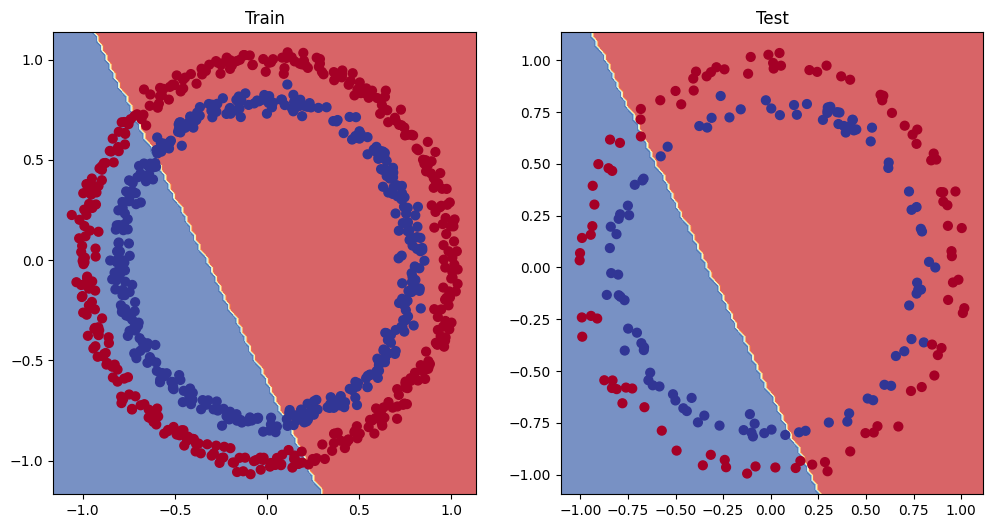

In [ ]:
# plot decision boundary of the model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

## 5. Improving our model (from a models perspective)
* add more layers (give more chances to learn)
* add more hidden units - go from 5-10 hidden units
* fit for more epochs
* changing the activation function
* change the learning rate
* changing the loss function

In [ ]:

class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10) # extra layer
        self.layer_3 = nn.Linear(in_features=10, out_features=1)

    def forward(self, x): # note: always make sure forward is spelt correctly!
        # Creating a model like this is the same as below, though below
        # generally benefits from speedups where possible.
        # z = self.layer_1(x)
        # z = self.layer_2(z)
        # z = self.layer_3(z)
        # return z
        return self.layer_3(self.layer_2(self.layer_1(x)))

model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
# loss_fn = nn.BCELoss() # Requires sigmoid on input
loss_fn = nn.BCEWithLogitsLoss() # Does not require sigmoid on input
optimizer = torch.optim.SGD(model_1.parameters(), lr=0.1)

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1000 # Train for longer

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    ### Training
    # 1. Forward pass
    y_logits = model_1(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> prediction probabilities -> prediction labels

    # 2. Calculate loss/accuracy
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_1.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = model_1(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        # 2. Caculate loss/accuracy
        test_loss = loss_fn(test_logits,
                            y_test)
        test_acc = accuracy_fn(y_true=y_test,
                               y_pred=test_pred)

    # Print out what's happening every 10 epochs
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69396, Accuracy: 50.88% | Test loss: 0.69261, Test acc: 51.00%
Epoch: 100 | Loss: 0.69305, Accuracy: 50.38% | Test loss: 0.69379, Test acc: 48.00%
Epoch: 200 | Loss: 0.69299, Accuracy: 51.12% | Test loss: 0.69437, Test acc: 46.00%
Epoch: 300 | Loss: 0.69298, Accuracy: 51.62% | Test loss: 0.69458, Test acc: 45.00%
Epoch: 400 | Loss: 0.69298, Accuracy: 51.12% | Test loss: 0.69465, Test acc: 46.00%
Epoch: 500 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69467, Test acc: 46.00%
Epoch: 600 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 700 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 800 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 900 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69468, Test acc: 46.00%


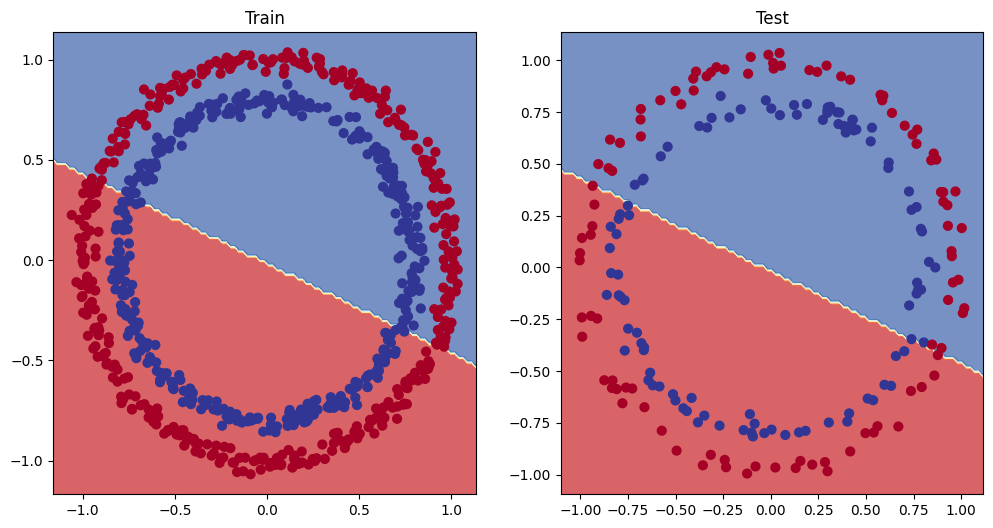

In [ ]:
# plot decision boundary of the model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

## 5.1 prepare date to see if model can fit a straight line.

One way to troubleshoot a larger problem is to test out a smaller problem

In [ ]:
# create some data

weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

#create data
X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias

print(len(X_regression), len(y_regression))

100 100


In [ ]:
train_split = int(0.8 * len(X_regression))
X_train_reg, y_train_reg = X_regression[:train_split], y_regression[:train_split]
X_test_reg, y_test_reg = X_regression[train_split:], y_regression[train_split:]

len(X_train_reg), len(y_train_reg), len(X_test_reg), len(y_test_reg)

(80, 80, 20, 20)

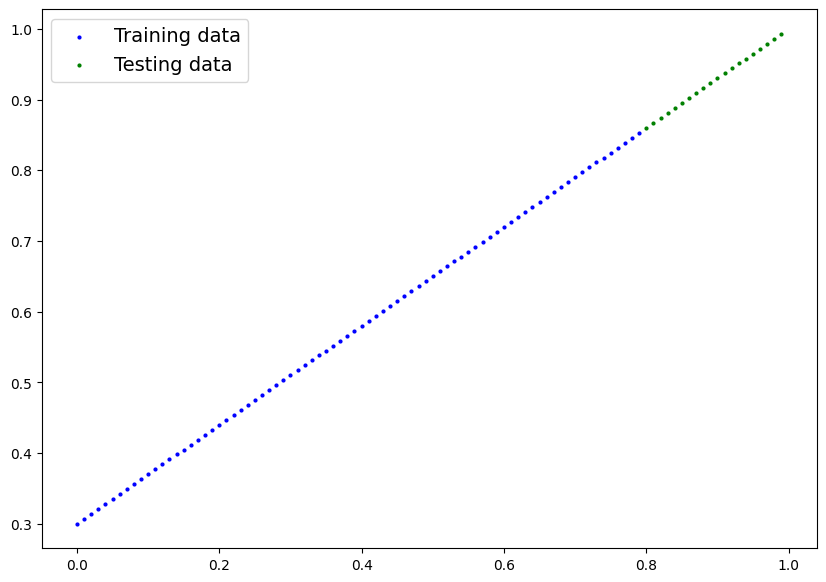

In [ ]:
plot_predictions(train_data=X_train_reg,
                 train_labels=y_train_reg,
                 test_data=X_test_reg,
                 test_labels=y_test_reg,
                 predictions=None)

In [ ]:
# adjust model 1 to fit a straight line data

# same architecture as model1, using nn.sequential

model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)

loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(model_2.parameters(), lr=0.01)

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1000

X_train_reg, y_train_reg = X_train_reg.to(device), y_train_reg.to(device)
X_test_reg, y_test_reg = X_test_reg.to(device), y_test_reg.to(device)

for epochs in range(epochs):
  y_pred = model_2(X_train_reg)
  loss = loss_fn(y_pred, y_train_reg)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_2.eval()
  with torch.inference_mode():
    test_pred = model_2(X_test_reg)
    test_loss = loss_fn(test_pred, y_test_reg)

#print out
if epochs % 100 == 0:
  print(f"Epoch: {epochs} | Loss: {loss:.5f} | Test Loss: {test_loss:.5f}")



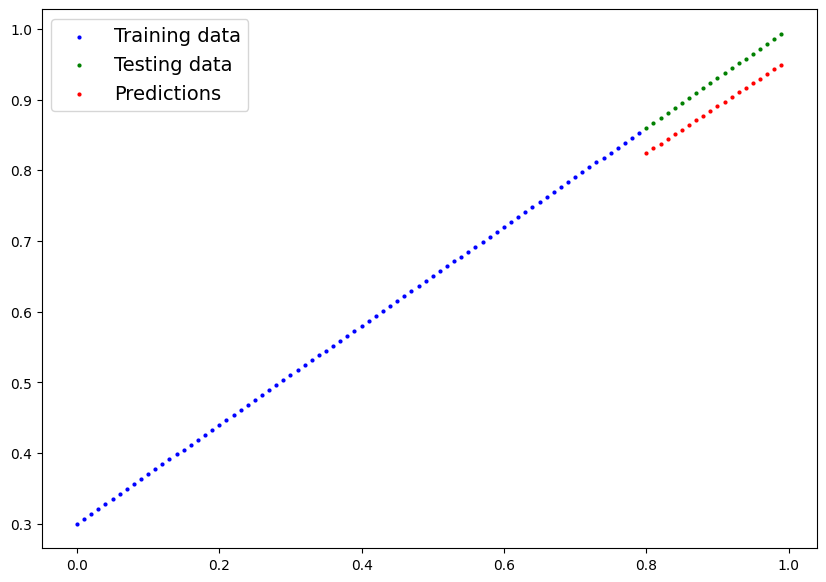

In [ ]:
# turn  on evaluation
model_2.eval()
with torch.inference_mode():
  y_preds = model_2(X_test_reg)
plot_predictions(train_data=X_train_reg.cpu(),
                 train_labels=y_train_reg.cpu(),
                 test_data=X_test_reg.cpu(),
                 test_labels=y_test_reg.cpu(),
                 predictions=y_preds.cpu())

##  6 the missing piece of our model: non linearity
"what patterns to draw if given an inifnite amount of straight or non-straight line?"


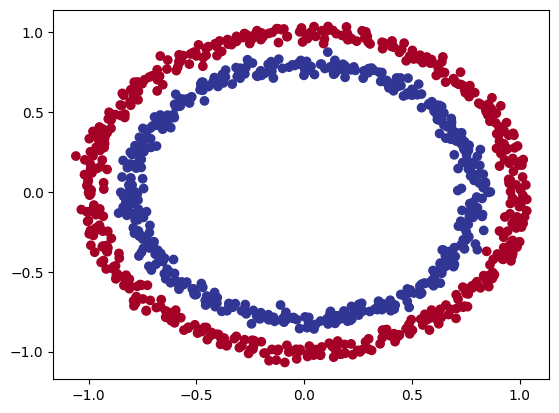

In [ ]:
### 6.1 recreating non-linearity

# make and plot data
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples, noise=0.03, random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

In [ ]:
# convert the data to tensors then to train and test

import torch
from sklearn.model_selection import train_test_split

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# split into train the test split

X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

In [ ]:
### 6.2 Building a model with non-linearity

from torch import nn

class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)
    self.relu = nn.ReLU()

  def forward(self, x):
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = CircleModelV2().to(device)
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [ ]:
# setu[p a loss and ooptimiser]

loss_fn = nn.BCEWithLogitsLoss()
optimiser = torch.optim.SGD(model_3.parameters(), lr=0.1)


In [ ]:
# Training our model

torch.manual_seed(42)
torch.cuda.manual_seed(42)

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

epochs = 1000

for epochs in range(epochs):
  model_3.train()
  y_logits = model_3(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true=y_train, y_pred=y_pred)
  optimiser.zero_grad()
  loss.backward()
  optimiser.step()

  model_3.eval()
  with torch.inference_mode():
    test_logits = model_3(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)

  if epochs % 100 == 0:
    print(f"Epoch: {epochs} | Loss: {loss:.5f} | Acc: {acc:.2f}% | Test Loss: {test_loss:.4f} | Test Acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69295 | Acc: 50.00% | Test Loss: 0.6932 | Test Acc: 50.00%
Epoch: 100 | Loss: 0.69115 | Acc: 52.88% | Test Loss: 0.6910 | Test Acc: 52.50%
Epoch: 200 | Loss: 0.68977 | Acc: 53.37% | Test Loss: 0.6894 | Test Acc: 55.00%
Epoch: 300 | Loss: 0.68795 | Acc: 53.00% | Test Loss: 0.6872 | Test Acc: 56.00%
Epoch: 400 | Loss: 0.68517 | Acc: 52.75% | Test Loss: 0.6841 | Test Acc: 56.50%
Epoch: 500 | Loss: 0.68102 | Acc: 52.75% | Test Loss: 0.6794 | Test Acc: 56.50%
Epoch: 600 | Loss: 0.67515 | Acc: 54.50% | Test Loss: 0.6729 | Test Acc: 56.00%
Epoch: 700 | Loss: 0.66659 | Acc: 58.38% | Test Loss: 0.6632 | Test Acc: 59.00%
Epoch: 800 | Loss: 0.65160 | Acc: 64.00% | Test Loss: 0.6476 | Test Acc: 67.50%
Epoch: 900 | Loss: 0.62362 | Acc: 74.00% | Test Loss: 0.6215 | Test Acc: 79.00%


In [ ]:
model_3.eval()
with torch.inference_mode():
  y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()
y_preds[:10]

tensor([1., 0., 1., 0., 0., 1., 0., 0., 1., 0.], device='cuda:0')

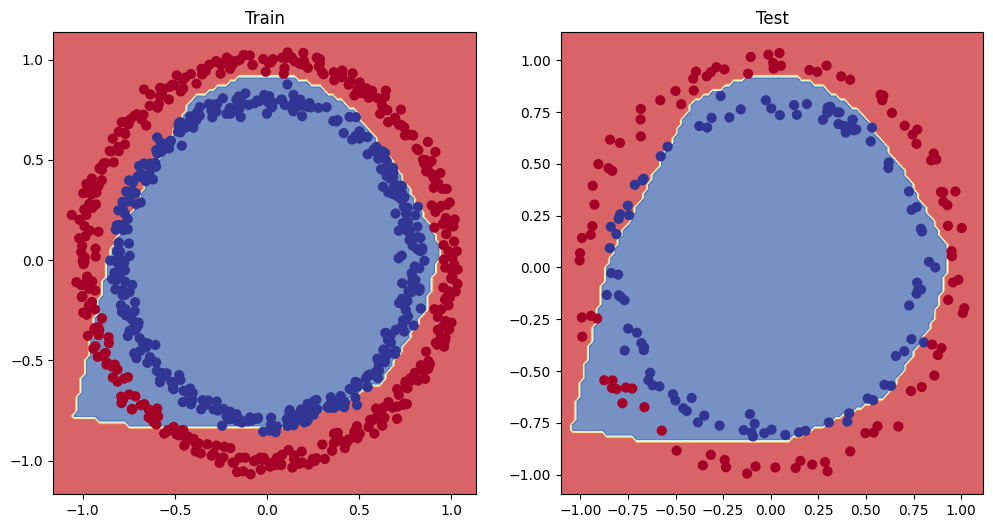

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_3, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test)

## 7. Replicating non linear activation function


In [ ]:
A = torch.arange(-10,10,1,dtype = torch.float32)
A.dtype

torch.float32

In [ ]:
def relu(x):
  return torch.maximum(torch.tensor(0), x)

relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

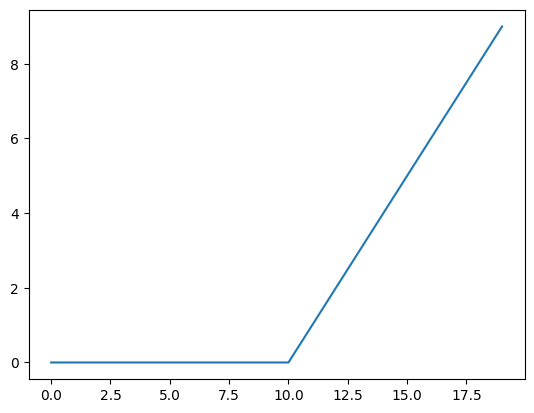

In [ ]:
#plot Relu Activation Function
plt.plot(relu(A))

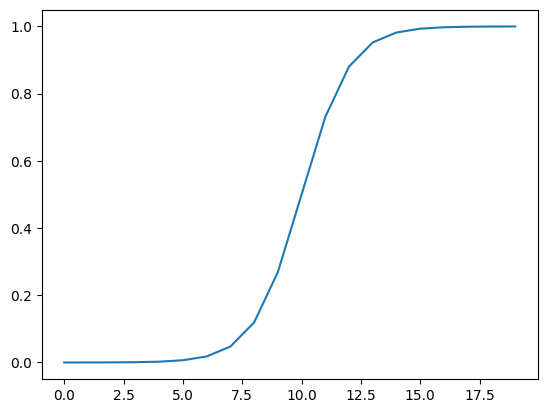

In [ ]:
def sigmoid(x):
  return 1/(1+torch.exp(-x))

plt.plot(sigmoid(A))

tensor([[  5.2482,   2.9501],
        [  2.3879,   0.7287],
        [ -5.6449, -11.4378],
        [  5.5355,   3.7024],
        [  0.9959,   4.8525]]) tensor([1, 1, 2, 1, 4])


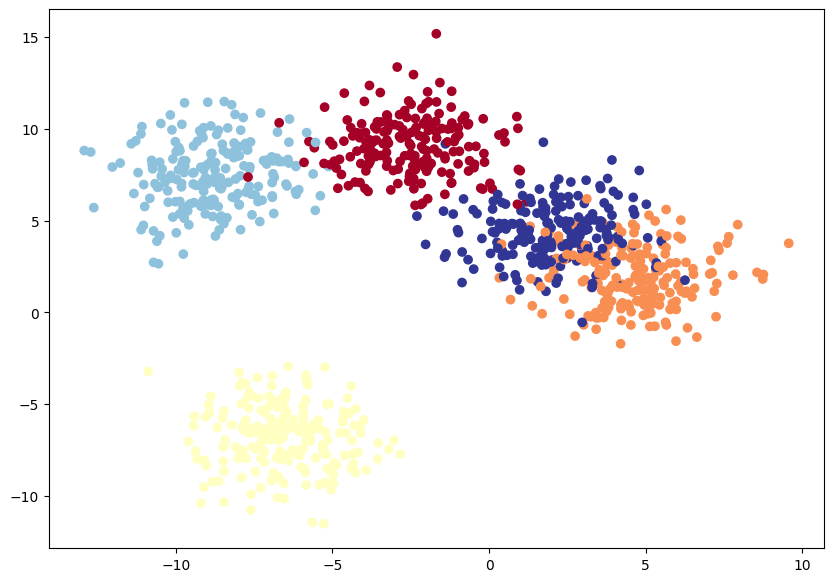

In [ ]:
# Import dependencies
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Set the hyperparameters for data creation
NUM_CLASSES = 5
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. Create multi-class data
X_blob, y_blob = make_blobs(n_samples=1000,
    n_features=NUM_FEATURES, # X features
    centers=NUM_CLASSES, # y labels
    cluster_std=1.6, # give the clusters a little shake up (try changing this to 1.0, the default)
    random_state=RANDOM_SEED
)

# 2. Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)
print(X_blob[:5], y_blob[:5])

# 3. Split into train and test sets
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
    y_blob,
    test_size=0.2,
    random_state=RANDOM_SEED
)

# 4. Plot data
plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu);

## Building a multiclass classification model in pytorch

In [ ]:
# Create device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
class BlobModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units=8):
    """Initialises multiclass classification model
    Args:
    input_features (int)
    output_features (int)
    hidden_units (int, optional)


    """
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=input_features, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_features)
    )

  def forward(self, x):
    return self.linear_layer_stack(x)

model_4 = BlobModel(input_features=2, output_features=5, hidden_units=10).to(device)

model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): ReLU()
    (2): Linear(in_features=10, out_features=10, bias=True)
    (3): ReLU()
    (4): Linear(in_features=10, out_features=5, bias=True)
  )
)

In [ ]:
# create a loss function multiclass classification
loss_fn = nn.CrossEntropyLoss()
optimiser = torch.optim.SGD(model_4.parameters(), lr=0.1)


In [ ]:
# building the traiing loops
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test.to(device))

y_logits[:10]

tensor([[-0.3782,  0.1029,  0.3920, -0.0017,  0.3693],
        [ 0.0098, -0.0396,  0.7431,  0.0789,  0.2025],
        [ 0.0321,  0.0250,  0.7553,  0.1108,  0.2183],
        [-0.0649, -0.1159,  0.2318,  0.2277, -0.0279],
        [-0.3262,  0.2647,  0.5223, -0.0949,  0.4739],
        [-0.4031, -0.0245,  0.3825,  0.1008,  0.3004],
        [-0.2497, -0.0250,  0.3400,  0.1063,  0.2155],
        [-0.1054, -0.1812,  1.0449, -0.0949,  0.4539],
        [-0.0948, -0.1123,  0.2990,  0.2201,  0.0322],
        [-0.1131, -0.1612,  0.8841, -0.0523,  0.3517]], device='cuda:0')

In [ ]:
y_blob_test[:10]

tensor([0, 1, 1, 2, 0, 3, 4, 1, 2, 1])

In [ ]:
# convert model's oogits output to prediction prob

y_pred_prob = torch.softmax(y_logits, dim=1)
print(y_pred_prob[:5])
print(y_logits[:5])


tensor([[0.1198, 0.1938, 0.2588, 0.1746, 0.2530],
        [0.1583, 0.1507, 0.3295, 0.1696, 0.1919],
        [0.1577, 0.1566, 0.3251, 0.1706, 0.1900],
        [0.1763, 0.1675, 0.2371, 0.2362, 0.1829],
        [0.1159, 0.2093, 0.2708, 0.1461, 0.2580]], device='cuda:0')
tensor([[-0.3782,  0.1029,  0.3920, -0.0017,  0.3693],
        [ 0.0098, -0.0396,  0.7431,  0.0789,  0.2025],
        [ 0.0321,  0.0250,  0.7553,  0.1108,  0.2183],
        [-0.0649, -0.1159,  0.2318,  0.2277, -0.0279],
        [-0.3262,  0.2647,  0.5223, -0.0949,  0.4739]], device='cuda:0')


In [ ]:
torch.max(y_pred_prob[0])

tensor(0.2588, device='cuda:0')

In [ ]:
# convert our model's prediciton probabblities to prediction labels

y_preds = torch.argmax(y_pred_prob, dim=1)
y_preds[:10]

tensor([2, 2, 2, 2, 2, 2, 2, 2, 2, 2], device='cuda:0')

In [ ]:
y_blob_test[:10]

tensor([0, 1, 1, 2, 0, 3, 4, 1, 2, 1])

In [ ]:
## Building our first training and testing loop

torch.manual_seed(42)
torch.cuda.manual_seed(42)
# fit the multiclass model

epochs = 1000

X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

for epochs in range(epochs):
  model_4.train()
  y_logits = model_4(X_blob_train).squeeze()
  y_pred = torch.softmax(y_logits, dim=1)
  y_pred_labels = torch.argmax(y_pred, dim=1)

  loss = loss_fn(y_logits, y_blob_train)
  acc  = accuracy_fn(y_true=y_blob_train,y_pred=y_pred_labels)
  optimiser.zero_grad()
  loss.backward()
  optimiser.step()

  model_4.eval()
  with torch.inference_mode():
    test_logits = model_4(X_blob_test).squeeze()
    test_pred = torch.softmax(test_logits, dim=1)
    test_pred_labels = torch.argmax(test_pred, dim=1)
    test_loss = loss_fn(test_logits, y_blob_test)
    test_acc = accuracy_fn(y_true=y_blob_test, y_pred=test_pred_labels)

  if epochs % 100 == 0:
   print(f"Epoch: {epochs} | Loss: {loss:.5f} | Acc: {acc:.2f}% | Test Loss: {test_loss:.5f} | Test Acc: {test_acc:.2f}%")


Epoch: 0 | Loss: 1.73646 | Acc: 15.88% | Test Loss: 1.63545 | Test Acc: 31.00%
Epoch: 100 | Loss: 0.37187 | Acc: 90.88% | Test Loss: 0.35684 | Test Acc: 90.50%
Epoch: 200 | Loss: 0.27882 | Acc: 91.38% | Test Loss: 0.27301 | Test Acc: 91.00%
Epoch: 300 | Loss: 0.24603 | Acc: 91.88% | Test Loss: 0.24308 | Test Acc: 91.50%
Epoch: 400 | Loss: 0.23907 | Acc: 91.38% | Test Loss: 0.24573 | Test Acc: 92.00%
Epoch: 500 | Loss: 0.22232 | Acc: 92.12% | Test Loss: 0.22812 | Test Acc: 91.50%
Epoch: 600 | Loss: 0.20802 | Acc: 92.25% | Test Loss: 0.21440 | Test Acc: 92.50%
Epoch: 700 | Loss: 0.20095 | Acc: 92.50% | Test Loss: 0.20869 | Test Acc: 92.50%
Epoch: 800 | Loss: 0.19621 | Acc: 93.00% | Test Loss: 0.20535 | Test Acc: 92.50%
Epoch: 900 | Loss: 0.19230 | Acc: 93.38% | Test Loss: 0.20231 | Test Acc: 92.00%


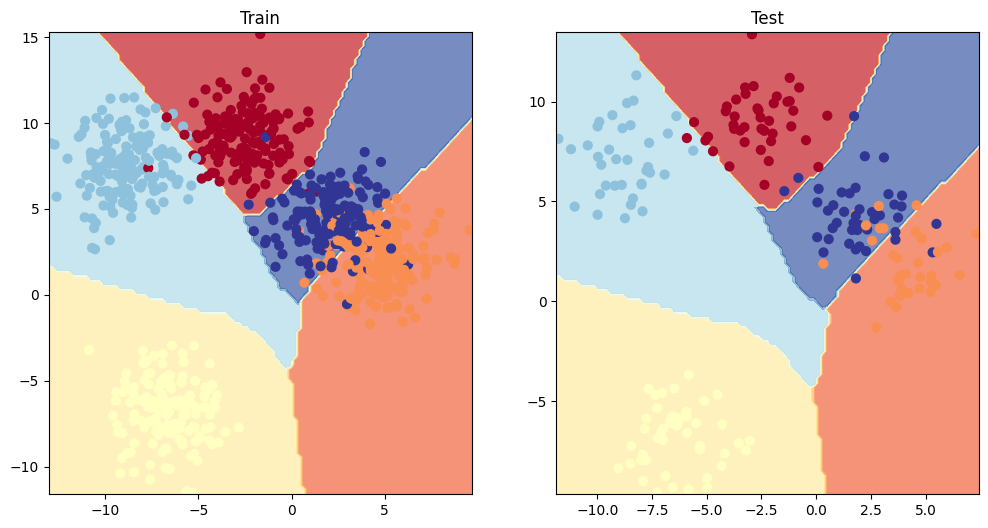

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)

## A few more classification matrix (to evaluate our model)
* accuracy
* F1 score
* precision
* confusion matrix
* recall
* classification report



In [ ]:
!pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 961.5/961.5 kB 57.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 123.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 98.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 59.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 104.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninsta

In [ ]:
from torchmetrics import Accuracy

torch_metrics_acc = Accuracy(task="multiclass", num_classes=5).to(device)
torch_metrics_acc(y_blob_test, test_pred_labels)

tensor(0.9150, device='cuda:0')